<font size="+5">#03. Arboles de Decision</font>

<ul>
    <li>Resolver dudas → Pregunta en <img src="https://discord.com/assets/f9bb9c4af2b9c32a2c5ee0014661546d.png" style="height: 1em; vertical-align: middle;"> <a href="https://discord.gg/cmB3KGsqMy">Discord</a></li>
    <li>Tutoriales → <img src="https://openmoji.org/php/download_asset.php?type=emoji&emoji_hexcode=E044&emoji_variant=color" style="height: 1em; vertical-align: middle;"> <a href="https://www.youtube.com/channel/UCovCte2I3loteQE_kRsfQcw">YouTube</a></li>
    <li>Reservar Clases → <span style="color: orange">@</span> <a href="https://sotastica.com/reservar">sotastica</a></li>
</ul>

# Cargar Datos

> Cargamos los datos del titanic para predecir la **probabilidad de que una persona sobreviva** en función de otras características como la **edad, sexo**, etc...

```python
sns.load_dataset(name='titanic')
```

In [1]:
import seaborn as sns

In [65]:
df = sns.load_dataset('titanic').iloc[:, :4]

In [67]:
df.isna().sum()

survived      0
pclass        0
sex           0
age         177
dtype: int64

In [70]:
df = df.dropna().reset_index(drop=True)

In [71]:
df.head()

,survived,pclass,sex,age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


# Seleccionar Variables para el Modelo

> Comúnmente se conoce a esta temática de la Estadística como **Análisis Exploratorio de los Datos _(EDA)_**. El objetivo fundamental de este tópico es encontrar las variables que más se correlacionen y que den a entender un modelo de Árboles de Decisión, donde la variable objetivo debería ser categórica.
>
> No vamos a aentrar mucho en detalle, de momento. Así que tan solo seleccionaremos variables que nos parezcan interesantes. Estas variables deberemos distinguirlas según su papel en el modelo:
>
> 1.  Explicativas/Features/Input `X`
> 2.  Objetivo/Class/Target `y`

In [72]:
objetivo= df['survived']

In [73]:
df.drop(['survived', 'sex'], axis=1)

,pclass,age
0,3,22.0
1,1,38.0
2,3,26.0
3,1,35.0
4,3,35.0
...,...,...
709,3,39.0
710,2,27.0
711,1,19.0
712,1,26.0


In [74]:
explicativas = df.drop(columns='survived')

# Modelo de Árboles de Decisión `DecisionTreeClassifier()`

## Entrenar Modelo

> 1. **Necesidad:** Entrenar Modelo
> 2. **Solución: Función** `fit()`

In [75]:
from sklearn.tree import DecisionTreeClassifier 

In [76]:
a = list()

In [77]:
type(a)

list

In [78]:
a.

SyntaxError: invalid syntax (3905452595.py, line 1)

In [79]:
model = DecisionTreeClassifier()

In [80]:
model.fit(y='survived', x=['pclass', 'survived'])

TypeError: fit() got an unexpected keyword argument 'x'

In [81]:
import pandas as pd

In [82]:
model.fit(y=objetivo, X=explicativas)

ValueError: could not convert string to float: 'male'

### dummy variables

In [83]:
explicativas = pd.get_dummies(data=explicativas, drop_first=True)

In [84]:
model.fit(y=objetivo, X=explicativas)

DecisionTreeClassifier()

In [85]:
explicativas

,pclass,age,sex_male
0,3,22.0,1
1,1,38.0,0
2,3,26.0,0
3,1,35.0,0
4,3,35.0,1
...,...,...,...
709,3,39.0,0
710,2,27.0,1
711,1,19.0,0
712,1,26.0,1


In [86]:
explicativas = explicativas.dropna().reset_index(drop=True)

In [87]:
explicativas

,pclass,age,sex_male
0,3,22.0,1
1,1,38.0,0
2,3,26.0,0
3,1,35.0,0
4,3,35.0,1
...,...,...,...
709,3,39.0,0
710,2,27.0,1
711,1,19.0,0
712,1,26.0,1


In [92]:
model = DecisionTreeClassifier(max_depth=2)

In [93]:
model.fit(y=objetivo, X=explicativas)

DecisionTreeClassifier(max_depth=2)

## Visualización del Modelo

> - `tree.plot_tree()`

In [94]:
from sklearn.tree import plot_tree

In [95]:
type(model)

sklearn.tree._classes.DecisionTreeClassifier

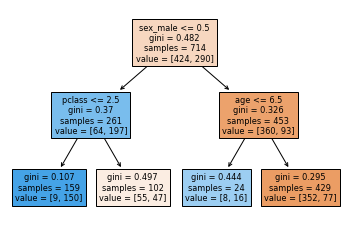

In [98]:
plot_tree(decision_tree=model, feature_names=explicativas.columns, filled=True);

## Predicciones con el Modelo

> - `model.predict_proba()`
> - `model.predict()`

In [120]:
352/429

0.8205128205128205

In [121]:
77/429

0.1794871794871795

In [99]:
juana = df.sample()

In [103]:
juana

,survived,pclass,sex,age
375,0,3,male,38.0


In [117]:
juana = explicativas.iloc[375,:].values.reshape(1,-1)

In [118]:
juana

array([[ 3., 38.,  1.]])

In [119]:
model.predict_proba(X=juana)

array([[0.82051282, 0.17948718]])

## Interpretación del Modelo

> ¿Qué tiene que ver el **Análisis Exploratorio de los Datos _(EDA)_** con la Interpretación del Modelo?

# Predicciones vs Realidad

> ¿Cómo de Bueno es mi Modelo? **Bondad de Ajuste**

## Precisión

> - `model.score()`

In [123]:
df.insert(0, 'pred', model.predict(X=explicativas))

In [126]:
comp = df.survived == df.pred

In [127]:
comp

0       True
1       True
2      False
3       True
4       True
       ...  
709     True
710     True
711     True
712    False
713     True
Length: 714, dtype: bool

In [128]:
comp.sum()

573

In [129]:
comp.sum()/714

0.8025210084033614

In [130]:
model.score(X=explicativas, y=objetivo)

0.8025210084033614

## Matriz de Confusión

> 1. **Sensitividad** (aciertos en casos positivos, $y=1$)
> 2. **Especificidad** (aciertos en casos negativos, $y=0$).

In [134]:
from sklearn.metrics import plot_confusion_matrix,classification_report

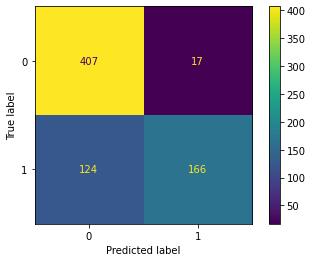

In [135]:
plot_confusion_matrix(estimator=model, X=explicativas, y_true=objetivo)

In [138]:
report = classification_report(y_pred = df['pred'], y_true=objetivo)

In [140]:
166/(166 + 124)

0.5724137931034483

In [140]:
166/(166 + 124)

0.5724137931034483

In [139]:
print(report)

              precision    recall  f1-score   support

           0       0.77      0.96      0.85       424
           1       0.91      0.57      0.70       290

    accuracy                           0.80       714
   macro avg       0.84      0.77      0.78       714
weighted avg       0.82      0.80      0.79       714



## Curva ROC

> Una forma de mezclar tanto la sensitividad, como la especificidad.

In [141]:
from sklearn.metrics import plot_roc_curve

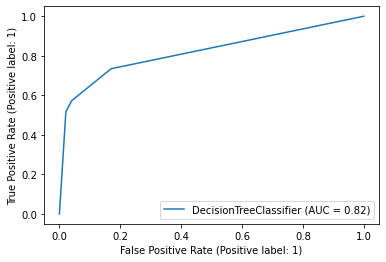

In [142]:
plot_roc_curve(estimator=model, X=explicativas, y=objetivo)